AHHHH I HATE FIGURES

In [2]:
from sklearn.model_selection import GridSearchCV
from unimodal_baseline import *
from dataloader import *
#from experiment import *
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

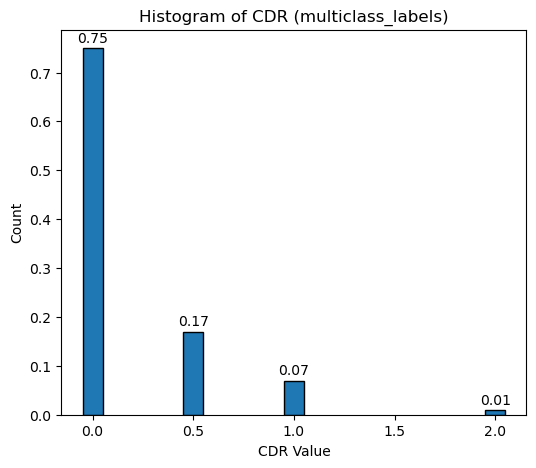

In [3]:
dataset = AlzheimerDataset('data')
cdr_values =dataset.multiclass_labels

unique, counts = np.unique(cdr_values, return_counts=True)

fig, ax = plt.subplots(figsize=(6,5))
bars = ax.bar(unique, np.round(counts/sum(counts), 2), width=0.1, edgecolor='black')  # width=0.1 for discrete values
ax.bar_label(bars, padding=2)
ax.set_xlabel('CDR Value')
ax.set_ylabel('Count')
ax.set_title('Histogram of CDR (multiclass_labels)')
plt.show()

In [11]:
np.unique(dataset.multiclass_labels)

array([0. , 0.5, 1. , 2. ])

In [4]:
train_loader, val_loader, test_loader = get_data_loaders('data')
tab_model = TabularBaseline()
tab_model.load_data(train_loader, test_loader, val_loader)
tab_model.train()

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

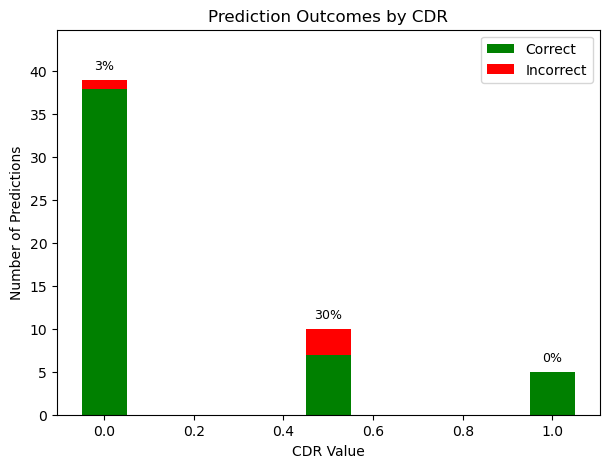

In [5]:
dataset = AlzheimerDataset('data')
cdr_values =dataset.multiclass_labels
y_pred = tab_model.model.predict(tab_model.X_test)
y_true = tab_model.y_test
test_indices = test_loader.dataset.indices
test_cdrs = np.array([dataset.multiclass_labels[i] for i in test_indices])

# Create masks
correct = (y_pred == y_true)
incorrect = ~correct

# Get CDR values for correct and incorrect predictions
correct_cdrs = test_cdrs[correct]
incorrect_cdrs = test_cdrs[incorrect]

# Get all unique CDR values across both sets
all_cdrs = np.unique(test_cdrs)

# Count correct and incorrect per CDR
correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
bar1 = ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
bar2 = ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

ymax = max(correct_counts+incorrect_counts) * 1.15  # 25% headroom
ax.set_ylim(0, ymax)

for j, (cdr, total, pct) in enumerate(zip(all_cdrs, correct_counts+incorrect_counts, incorrect_counts/(correct_counts+incorrect_counts))):
    ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('CDR Value')
ax.set_ylabel('Number of Predictions')
ax.set_title('Prediction Outcomes by CDR')
ax.legend()
plt.show()

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

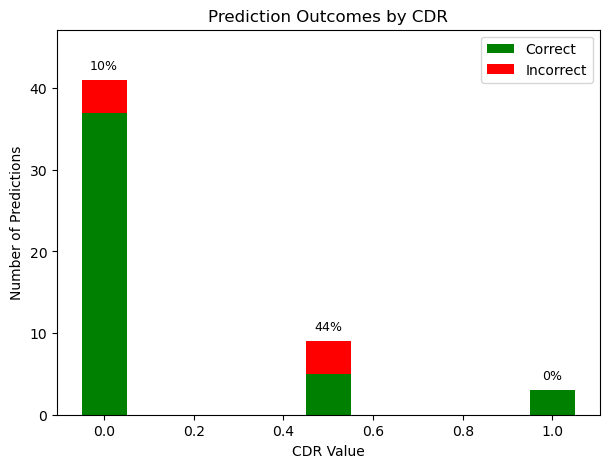

In [6]:
tab_model = TabularBaseline()
tab_model.load_data(train_loader, test_loader, val_loader)
tab_model.train()

dataset = AlzheimerDataset('data')
cdr_values =dataset.multiclass_labels
y_pred = tab_model.model.predict(tab_model.X_val)
y_true = tab_model.y_val
val_indices = val_loader.dataset.indices
val_cdr = np.array([dataset.multiclass_labels[i] for i in val_indices])

# Create masks
correct = (y_pred == y_true)
incorrect = ~correct

# Get CDR values for correct and incorrect predictions
correct_cdrs = val_cdr[correct]
incorrect_cdrs = val_cdr[incorrect]

# Get all unique CDR values across both sets
all_cdrs = np.unique(val_cdr)

# Count correct and incorrect per CDR
correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
bar1 = ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
bar2 = ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

ymax = max(correct_counts+incorrect_counts) * 1.15  # 25% headroom
ax.set_ylim(0, ymax)

for j, (cdr, total, pct) in enumerate(zip(all_cdrs, correct_counts+incorrect_counts, incorrect_counts/(correct_counts+incorrect_counts))):
    ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('CDR Value')
ax.set_ylabel('Number of Predictions')
ax.set_title('Prediction Outcomes by CDR')
ax.legend()
plt.show()

In [14]:
tab_acc = tab_model.evaluate()

ValueError: Found input variables with inconsistent numbers of samples: [54, 53]

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None, 0.5, 3],
}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None, 0.5, 3],
}

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring=scoring_metrics,
    refit='f1',  # Refit the final model using the best F1 score
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(tab_model.X_train, tab_model.y_train)
print("Best parameters (based on F1):", grid_search.best_params_)

# Extract and display the full results
results_df = pd.DataFrame(grid_search.cv_results_)
metrics = ['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
print("\nTop results by F1 score:")
print(results_df[['params'] + metrics].sort_values(by='mean_test_f1', ascending=False).head(5).to_string(index=False))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_

In [17]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select and rename relevant columns for clarity
results_table = results_df[
    ['param_n_estimators', 'param_max_depth', 'param_max_features',
     'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
].rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'mean_test_accuracy': 'mean_accuracy',
    'mean_test_precision': 'mean_precision',
    'mean_test_recall': 'mean_recall',
    'mean_test_f1': 'mean_f1',
})

# Round all metric columns for clarity
metric_cols = ['mean_accuracy', 'mean_precision', 'mean_recall', 'mean_f1']
results_table[metric_cols] = results_table[metric_cols].round(3)

# Sort by best mean F1
results_table = results_table.sort_values(by='mean_f1', ascending=False)

# Print as formatted table
print("\nGrid Search Results (sorted by mean F1):")
print(results_table.to_string(index=False))


Grid Search Results (sorted by mean F1):
 n_estimators max_depth max_features  mean_accuracy  mean_precision  mean_recall  mean_f1
          200      None         sqrt          0.915           0.863        0.790    0.820
          200        10         sqrt          0.915           0.863        0.790    0.820
          300      None         sqrt          0.915           0.863        0.790    0.820
          200        15         sqrt          0.915           0.863        0.790    0.820
          500      None            3          0.911           0.839        0.806    0.815
          500      None         None          0.911           0.839        0.806    0.815
          300        15            3          0.911           0.839        0.806    0.815
          500        15         None          0.911           0.839        0.806    0.815
          300      None         log2          0.911           0.839        0.806    0.815
          500      None         log2          0.911       

In [18]:

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select and rename relevant columns for clarity
results_table = results_df[
    ['param_n_estimators', 'param_max_depth', 'param_max_features',
     'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
].rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'mean_test_accuracy': 'mean_accuracy',
    'mean_test_precision': 'mean_precision',
    'mean_test_recall': 'mean_recall',
    'mean_test_f1': 'mean_f1',
})

# Round all metric columns for clarity
metric_cols = ['mean_accuracy', 'mean_precision', 'mean_recall', 'mean_f1']
results_table[metric_cols] = results_table[metric_cols].round(3)

# Sort by best mean F1
results_table = results_table.sort_values(by='mean_f1', ascending=False)

# Get top 5 rows with unique F1 scores
top_5_unique_f1 = results_table.drop_duplicates(subset=['mean_f1']).head(5)

# Print as formatted table
print("\nTop 5 Unique F1 Scores:")
print(top_5_unique_f1.to_string(index=False))


Top 5 Unique F1 Scores:
 n_estimators max_depth max_features  mean_accuracy  mean_precision  mean_recall  mean_f1
          200      None         sqrt          0.915           0.863        0.790    0.820
          500      None            3          0.911           0.839        0.806    0.815
          500      None         sqrt          0.911           0.849        0.790    0.813
          100        15         sqrt          0.911           0.863        0.774    0.812
          300      None         None          0.907           0.819        0.806    0.808


In [ ]:
# Assuming you have the validation results in a DataFrame called val_results_table
val_results_table = pd.DataFrame({
    'n_estimators': [200, 50, 200, 200, 100],
    'max_depth': [10, 15, 5, 5, 5],
    'max_features': ['sqrt', 'sqrt', 'sqrt', None, 'sqrt'],
    'val_F1': [0.786, 0.786, 0.741, 0.714, 0.667],
    'train_F1': [1.000, 1.000, 0.883, 0.946, 0.919]  # Add train F1 values here based on your earlier table
})

# Calculate combined F1 as the simple average
val_results_table['combined_F1'] = (val_results_table['val_F1'] + val_results_table['train_F1']) / 2

# Sort by combined F1 descending
ranked_table = val_results_table.sort_values(by='combined_F1', ascending=False)

# Select top 3 based on actual validation F1
top_5 = ranked_table.head(3)

print(top_5)

   n_estimators  max_depth max_features  val_F1  train_F1  combined_F1
0           200         10         sqrt   0.786     1.000        0.893
1            50         15         sqrt   0.786     1.000        0.893
3           200          5         None   0.714     0.946        0.830


Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

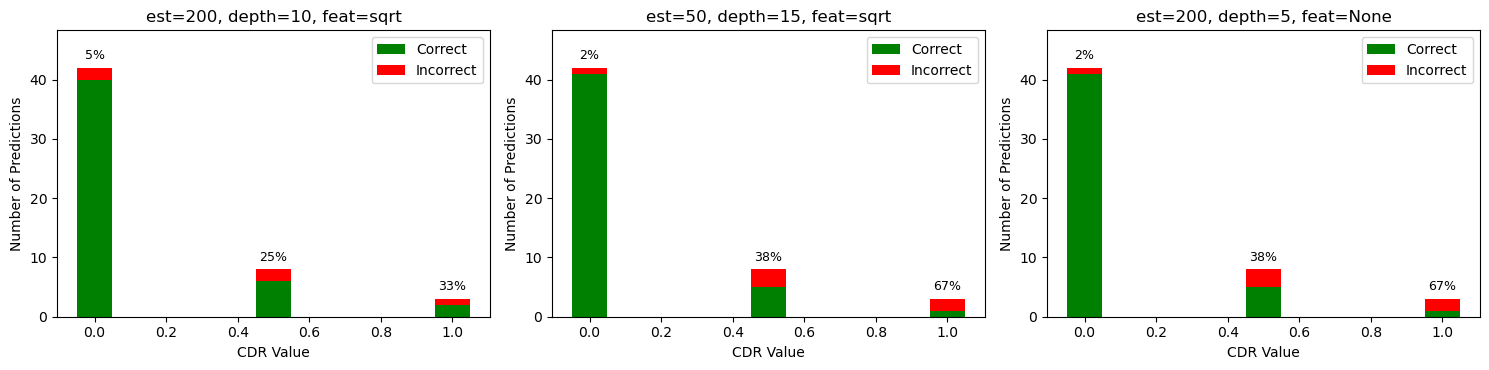

In [9]:
# Corrected DataFrame with proper None handling
val_results_table = pd.DataFrame({
    'n_estimators': [200, 50, 200, 200, 100],
    'max_depth': [10, 15, 5, 5, 5],
    'max_features': ['sqrt', 'sqrt', 'sqrt', None, 'sqrt'],
    'val_F1': [0.786, 0.786, 0.741, 0.714, 0.667],
    'train_F1': [1.000, 1.000, 0.883, 0.946, 0.919]
})

# Calculate combined F1 and sort
val_results_table['combined_F1'] = (val_results_table['val_F1'] + val_results_table['train_F1']) / 2
ranked_table = val_results_table.sort_values(by='combined_F1', ascending=False)

# Select top 3 models only
top_3 = ranked_table.head(3)

# Plotting setup
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for idx, (_, row) in enumerate(top_3.iterrows()):
    tab_model = TabularBaseline(
        int(row['n_estimators']),
        int(row['max_depth']) if not pd.isna(row['max_depth']) else None,
        row['max_features'],
        42
    )
    tab_model.load_data(train_loader, test_loader, val_loader)
    tab_model.train()

    # Predictions on validation set
    y_pred = tab_model.model.predict(tab_model.X_val)
    y_true = tab_model.y_val
    val_indices = val_loader.dataset.indices
    val_cdrs = np.array([dataset.multiclass_labels[i] for i in val_indices])

    correct = (y_pred == y_true)
    incorrect = ~correct
    correct_cdrs = val_cdrs[correct]
    incorrect_cdrs = val_cdrs[incorrect]
    all_cdrs = np.unique(val_cdrs)

    correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
    incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])
    total_counts = correct_counts + incorrect_counts
    percent_incorrect = np.divide(incorrect_counts, total_counts, out=np.zeros_like(incorrect_counts, dtype=float), where=total_counts != 0)

    # Plot
    ax = axes[idx // cols][idx % cols]
    ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
    ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

    ymax = max(total_counts) * 1.15
    ax.set_ylim(0, ymax)

    for j, (cdr, total, pct) in enumerate(zip(all_cdrs, total_counts, percent_incorrect)):
        ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('CDR Value')
    ax.set_ylabel('Number of Predictions')
    ax.set_title(f'est={int(row["n_estimators"])}, depth={row["max_depth"]}, feat={row["max_features"]}')
    ax.legend()

# Hide any unused subplots
for idx in range(len(top_3), rows * cols):
    fig.delaxes(axes[idx // cols][idx % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

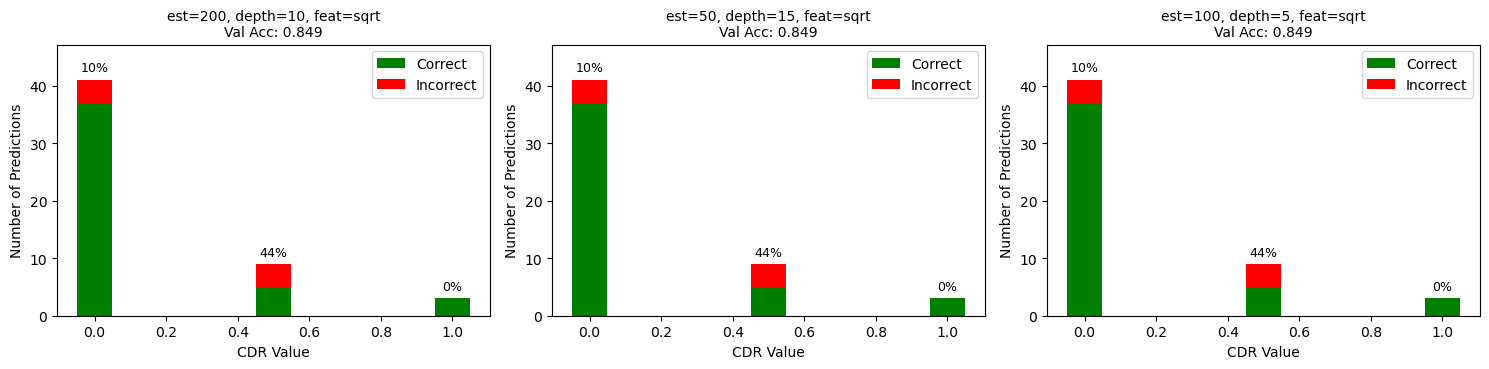

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

top_5 = pd.DataFrame({
    'n_estimators': [200, 50, 100, 200, 200],
    'max_depth': [10, 15, 5, 5, 5],
    'max_features': ['sqrt', 'sqrt', 'sqrt', 'sqrt', None],
    'val_F1': [0.640, 0.640, 0.696, 0.667, 0.636],
    'train_F1': [1.000, 1.000, 0.931, 0.948, 0.966]
})

top_5['combined_F1'] = (top_5['val_F1'] + top_5['train_F1']) / 2
top_5 = top_5.sort_values(by='combined_F1', ascending=False)

# Select top 3 models only
top_3 = top_5.head(3)

# Plotting setup
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

# Load dataset once to ensure consistency
dataset = AlzheimerDataset('data')

for idx, (_, row) in enumerate(top_3.iterrows()):
    tab_model = TabularBaseline(
        int(row['n_estimators']),
        int(row['max_depth']) if not pd.isna(row['max_depth']) else None,
        row['max_features'],
        42
    )
    tab_model.load_data(train_loader, test_loader, val_loader)
    tab_model.train()

    # Predictions on validation set
    y_pred = tab_model.model.predict(tab_model.X_val)
    y_true = tab_model.y_val
    val_indices = val_loader.dataset.indices
    val_cdrs = np.array([dataset.multiclass_labels[i] for i in val_indices])

    correct = (y_pred == y_true)
    incorrect = ~correct
    correct_cdrs = val_cdrs[correct]
    incorrect_cdrs = val_cdrs[incorrect]
    all_cdrs = np.unique(val_cdrs)

    correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
    incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])
    total_counts = correct_counts + incorrect_counts
    percent_incorrect = np.divide(
        incorrect_counts, total_counts, 
        out=np.zeros_like(incorrect_counts, dtype=float), 
        where=total_counts != 0
    )

    accuracy = np.mean(y_pred == y_true)

    # Plot
    ax = axes[idx // cols][idx % cols]
    ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
    ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

    ymax = max(total_counts) * 1.15
    ax.set_ylim(0, ymax)

    for j, (cdr, total, pct) in enumerate(zip(all_cdrs, total_counts, percent_incorrect)):
        ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('CDR Value')
    ax.set_ylabel('Number of Predictions')
    ax.set_title(
        f'est={int(row["n_estimators"])}, depth={row["max_depth"]}, feat={row["max_features"]}\n'
        f'Val Acc: {accuracy:.3f}', fontsize=10
    )
    ax.legend()

# Hide unused subplots
for idx in range(len(top_3), rows * cols):
    fig.delaxes(axes[idx // cols][idx % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

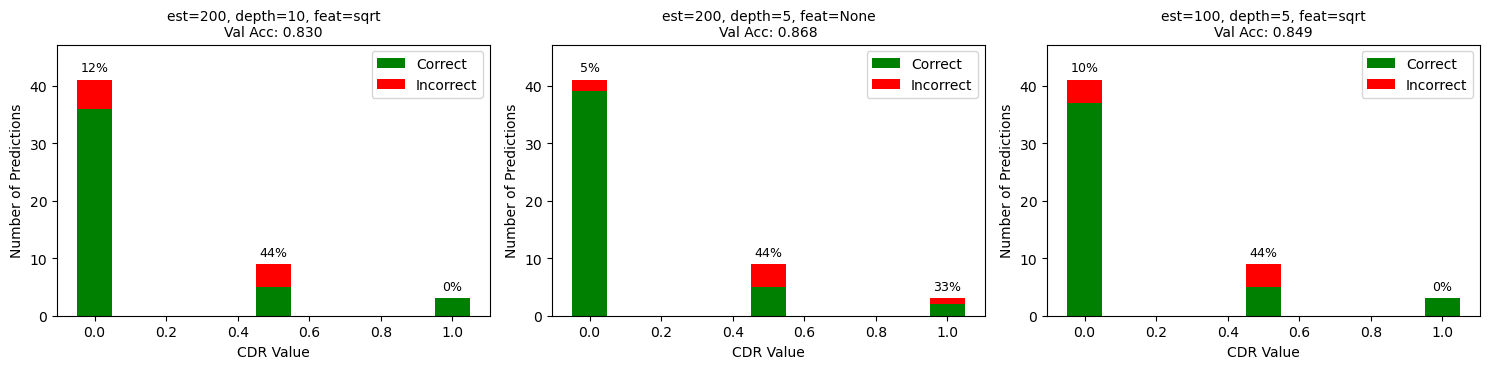

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define top 5 configurations
top_5 = pd.DataFrame({
    'n_estimators': [200, 100, 200, 200, 50],
    'max_depth': [5, 5, 10, 5, 15],
    'max_features': [None, 'sqrt', 'sqrt', 'sqrt', 'sqrt'],
    'train_F1': [0.957, 0.957, 1.000, 0.948, 1.000],
    'val_F1': [0.667, 0.667, 0.667, 0.667, 0.609]
})

top_5['combined_F1'] = (top_5['val_F1'] + top_5['train_F1']) / 2
top_5 = top_5.sort_values(by='combined_F1', ascending=False)
top_3 = top_5.head(3)  # Plot top 3 only

# Load dataset and data once
dataset = AlzheimerDataset('data')
data_loader_model = TabularBaseline()
data_loader_model.load_data(train_loader, test_loader, val_loader)

train_data = (data_loader_model.X_train, data_loader_model.y_train)
val_data = (data_loader_model.X_val, data_loader_model.y_val)
test_data = (data_loader_model.X_test, data_loader_model.y_test)

val_indices = val_loader.dataset.indices
val_cdrs = np.array([dataset.multiclass_labels[i] for i in val_indices])

# Plotting setup
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for idx, (_, row) in enumerate(top_3.iterrows()):
    tab_model = TabularBaseline(
        int(row['n_estimators']),
        int(row['max_depth']) if not pd.isna(row['max_depth']) else None,
        row['max_features'],
        42
    )
    # Load pre-extracted data directly
    tab_model.X_train, tab_model.y_train = train_data
    tab_model.X_val, tab_model.y_val = val_data
    tab_model.X_test, tab_model.y_test = test_data

    tab_model.train()

    # Predictions and Accuracy on Validation Set
    y_pred = tab_model.model.predict(tab_model.X_val)
    y_true = tab_model.y_val
    accuracy = np.mean(y_pred == y_true)

    correct = (y_pred == y_true)
    incorrect = ~correct
    correct_cdrs = val_cdrs[correct]
    incorrect_cdrs = val_cdrs[incorrect]
    all_cdrs = np.unique(val_cdrs)

    correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
    incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])
    total_counts = correct_counts + incorrect_counts
    percent_incorrect = np.divide(
        incorrect_counts, total_counts, 
        out=np.zeros_like(incorrect_counts, dtype=float), 
        where=total_counts != 0
    )

    # Plot
    ax = axes[idx // cols][idx % cols]
    ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
    ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

    ymax = max(total_counts) * 1.15
    ax.set_ylim(0, ymax)

    for j, (cdr, total, pct) in enumerate(zip(all_cdrs, total_counts, percent_incorrect)):
        ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('CDR Value')
    ax.set_ylabel('Number of Predictions')
    ax.set_title(
        f'est={int(row["n_estimators"])}, depth={row["max_depth"]}, feat={row["max_features"]}\n'
        f'Val Acc: {accuracy:.3f}', fontsize=10
    )
    ax.legend()

# Hide unused subplots
for idx in range(len(top_3), rows * cols):
    fig.delaxes(axes[idx // cols][idx % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


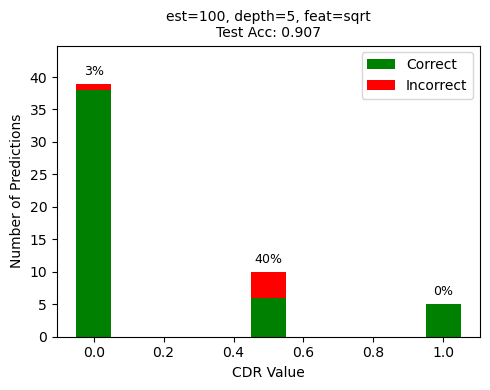

In [20]:
test_indices = test_loader.dataset.indices
test_cdrs = np.array([dataset.multiclass_labels[i] for i in test_indices])


# Initialize model with selected hyperparameters
tab_model = TabularBaseline(
    n_estimators=100,
    max_depth=5,
    max_features='sqrt',
    random_state=42
)

# Load pre-extracted data directly
tab_model.X_train, tab_model.y_train = train_data
tab_model.X_val, tab_model.y_val = val_data
tab_model.X_test, tab_model.y_test = test_data

# Train and evaluate on test set
tab_model.train()
y_pred = tab_model.model.predict(tab_model.X_test)
y_true = tab_model.y_test
accuracy = np.mean(y_pred == y_true)

# Compute correct/incorrect predictions by CDR value
correct = (y_pred == y_true)
incorrect = ~correct
correct_cdrs = test_cdrs[correct]
incorrect_cdrs = test_cdrs[incorrect]
all_cdrs = np.unique(test_cdrs)

correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])
total_counts = correct_counts + incorrect_counts
percent_incorrect = np.divide(
    incorrect_counts, total_counts, 
    out=np.zeros_like(incorrect_counts, dtype=float), 
    where=total_counts != 0
)

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

ymax = max(total_counts) * 1.15
ax.set_ylim(0, ymax)

for cdr, total, pct in zip(all_cdrs, total_counts, percent_incorrect):
    ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('CDR Value')
ax.set_ylabel('Number of Predictions')
ax.set_title('est=100, depth=5, feat=sqrt\nTest Acc: {:.3f}'.format(accuracy), fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
train_loader, val_loader, test_loader = get_data_loaders('data')

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

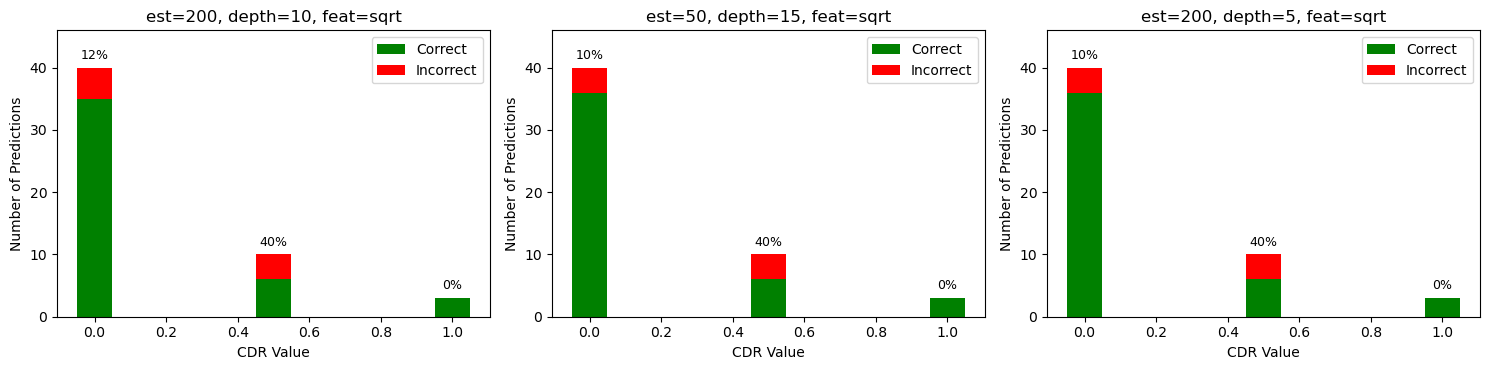

In [25]:
# Adjust this depending on your grid
rows, cols = 1, 3  # makes room for up to 6 plots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for idx, (i, row) in enumerate(top_5.iterrows()):
    # Create and train model with current hyperparameters
    tab_model = TabularBaseline(
        row['n_estimators'],
        row['max_depth'],
        row['max_features'],
        42
    )
    tab_model.load_data(train_loader, test_loader, val_loader)
    tab_model.train()

    # Predictions
    y_pred = tab_model.model.predict(tab_model.X_test)
    y_true = tab_model.y_test
    test_indices = test_loader.dataset.indices
    test_cdrs = np.array([dataset.multiclass_labels[i] for i in test_indices])

    # Correct and incorrect masks
    correct = (y_pred == y_true)
    incorrect = ~correct
    correct_cdrs = test_cdrs[correct]
    incorrect_cdrs = test_cdrs[incorrect]
    all_cdrs = np.unique(val_cdrs)

    # Counts
    correct_counts = np.array([np.sum(correct_cdrs == cdr) for cdr in all_cdrs])
    incorrect_counts = np.array([np.sum(incorrect_cdrs == cdr) for cdr in all_cdrs])
    total_counts = correct_counts + incorrect_counts
    percent_incorrect = np.divide(incorrect_counts, total_counts, out=np.zeros_like(incorrect_counts, dtype=float), where=total_counts!=0)

    # Plot on grid
    ax = axes[idx // cols][idx % cols]
    bar1 = ax.bar(all_cdrs, correct_counts, width=0.1, label='Correct', color='green')
    bar2 = ax.bar(all_cdrs, incorrect_counts, width=0.1, bottom=correct_counts, label='Incorrect', color='red')

    # Add % incorrect labels and extend y-limit
    ymax = max(total_counts) * 1.15  # 25% headroom
    ax.set_ylim(0, ymax)

    for j, (cdr, total, pct) in enumerate(zip(all_cdrs, total_counts, percent_incorrect)):
        ax.text(cdr, total + ymax * 0.02, f'{100 * pct:.0f}%', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel('CDR Value')
    ax.set_ylabel('Number of Predictions')
    ax.set_title(f'est={row["n_estimators"]}, depth={row["max_depth"]}, feat={row["max_features"]}')
    ax.legend()

# Hide empty subplots if fewer than grid cells
for idx in range(len(top_5), rows * cols):
    fig.delaxes(axes[idx // cols][idx % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
i = 0 
for idx, (i, row) in enumerate(top_5.iterrows()):
    if i < 1:
        # Create and train model with current hyperparameters
        model = RandomForestClassifier(
            n_estimators=row['n_estimators'],
            max_depth=row['max_depth'],
            max_features=row['max_features'],
            random_state=42
        )
        model.fit(tab_model.X_train, tab_model.y_train)
        model.evaluate(True)
    i += 1

In [ ]:
train_loader, val_loader, test_loader = get_data_loaders('data')
tab_model = TabularBaseline()
tab_model.load_data(train_loader, test_loader, val_loader)  # Replace with your actual loaders

Loading training data:   0%|          | 0/8 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
Loading test data:   0%|          | 0/2 [00:00<?, ?it/s]/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slice
  self._feature_means = np.nanmean(all_tabular, axis=0)
/Users/lolakovalski/Desktop/lola/code/ADmulti/dataloader.py:178: RuntimeWarning: Mean of empty slic

In [ ]:
tab_model.evaluate_top_5_configs()

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=3, max_features=sqrt, n_

In [ ]:
def evaluate_configurations(estimator_configs, train_loader, val_loader, test_loader):

    records = []
    dataset = AlzheimerDataset('data')  # Load once for CDR mapping

    for config in estimator_configs:
        n_estimators, max_depth, max_features = config
        print(f"\nEvaluating Config: est={n_estimators}, depth={max_depth}, feat={max_features}")

        # Initialize and train model
        model = TabularBaseline(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            max_features=max_features
        )
        model.X_train, model.y_train = train_loader
        model.X_val, model.y_val = val_loader
        model.X_test, model.y_test = test_loader
        model.train()

        # Evaluate on train, val, and test sets
        for dataset_name, (X, y) in [('Train', (model.X_train, model.y_train)),
                                     ('Validation', (model.X_val, model.y_val)),
                                     ('Test', (model.X_test, model.y_test))]:
            metrics = model._evaluate_specific_model(model.model, X, y)
            record = {
                'Set': dataset_name,
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_features,
                **metrics
            }
            records.append(record)

    return pd.DataFrame(records)


In [18]:
configs = [
    (100, 5, 'sqrt'),
    (200, 5, None),
    (200, 10, 'sqrt'),
    (50, 15, 'sqrt'),
    (200, 5, 'sqrt')
]

# Step 2: Extract Arrays for All Configurations
train_data = (data_loader_model.X_train, data_loader_model.y_train)
val_data = (data_loader_model.X_val, data_loader_model.y_val)
test_data = (data_loader_model.X_test, data_loader_model.y_test)

results_df = evaluate_configurations(configs, train_data, val_data, test_data)
print(results_df)



Evaluating Config: est=100, depth=5, feat=sqrt
----------------------------------------
Accuracy  : 0.980
Precision : 0.982
Recall    : 0.933
F1        : 0.957
----------------------------------------
----------------------------------------
Accuracy  : 0.849
Precision : 0.667
Recall    : 0.667
F1        : 0.667
----------------------------------------
----------------------------------------
Accuracy  : 0.907
Precision : 0.917
Recall    : 0.733
F1        : 0.815
----------------------------------------

Evaluating Config: est=200, depth=5, feat=None
----------------------------------------
Accuracy  : 0.976
Precision : 0.982
Recall    : 0.917
F1        : 0.948
----------------------------------------
----------------------------------------
Accuracy  : 0.868
Precision : 0.778
Recall    : 0.583
F1        : 0.667
----------------------------------------
----------------------------------------
Accuracy  : 0.907
Precision : 0.917
Recall    : 0.733
F1        : 0.815
---------------------